### Exploring data of (ICFES-Instituto Colombiano para la Evaluación de la Educación)  

ICFES stands for "Instituto Colombiano para la Evaluación de la Educación" (Colombian Institute for the Evaluation of Education), which is a Colombian government agency responsible for assessing the quality of education in the country. It was established in 1968 and operates under the Ministry of National Education.

The primary function of ICFES is to administer standardized tests that measure the academic performance of students at different levels of education, including primary, secondary, and higher education. These tests are known as the "Pruebas Saber" (Knowledge Tests) and are held annually. The results of these tests are used to evaluate the educational system, identify areas of improvement, and provide feedback to schools and policymakers.

#### Setting up the enviroment 

In [ ]:
# importing libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime


#read the data
data=pd.read_csv('Saber_11__2019-2.csv', delimiter=",", encoding='utf-8')


In [ ]:
pd.set_option('display.max_columns', None)

#### Getting familiar with data

In [ ]:
data.head()

In [ ]:
forma=data.shape
print("This data frame has "+str(forma[0])+" observations and "+str(forma[1])+" features. ")

#### There are some features that aren't relevant in order to analize the data. So let's drop them:

In [ ]:
data.info()

In [ ]:
df=data[['ESTU_GENERO','ESTU_FECHANACIMIENTO',
        'FAMI_ESTRATOVIVIENDA', 'FAMI_PERSONASHOGAR', 
        'FAMI_EDUCACIONMADRE','FAMI_TIENEINTERNET', 
        'FAMI_TIENECOMPUTADOR', 'ESTU_DEDICACIONLECTURADIARIA',
        'COLE_CALENDARIO','COLE_MCPIO_UBICACION',
        'COLE_DEPTO_UBICACION', 'PUNT_LECTURA_CRITICA',
        'PUNT_MATEMATICAS','PUNT_GLOBAL']]

#### Data manipulation

In [ ]:
#Calculating missing values in rows
df.isnull().sum() 

#### Let's drop missing values 

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.to_csv('df1.csv', index=False)


## DESDE AQUI LABOURO

In [2]:
# importing libraries and data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, datetime
from sklearn.model_selection import train_test_split

df=pd.read_csv('df1.csv', encoding='utf-8')

#### Next, let's analize each column  

##### ESTU_GENERO                     

In [3]:
df.ESTU_GENERO.value_counts()                     

ESTU_GENERO
F    280020
M    236446
-       114
Name: count, dtype: int64

In [4]:
# Calculating the proportion of  'M' and 'F'
proporcion_m = len(df[df['ESTU_GENERO'] == 'M']) / len(df[df['ESTU_GENERO'] != '-'])
proporcion_f = len(df[df['ESTU_GENERO'] == 'F']) / len(df[df['ESTU_GENERO'] != '-'])

# replace the values "-" for the distribution of  'M' and 'F'
df['ESTU_GENERO'] = np.where(df['ESTU_GENERO'] == '-', np.random.choice(['M', 'F'], p=[proporcion_m, proporcion_f]), df['ESTU_GENERO'])

In [5]:
df.ESTU_GENERO.value_counts()

ESTU_GENERO
F    280134
M    236446
Name: count, dtype: int64

##### ESTU_FECHANACIMIENTO            

In [6]:
# rename the column to "EDAD"
df.rename(columns={'ESTU_FECHANACIMIENTO':'EDAD'},inplace=True)
#Identify and remove rows with invalid dates 
df = df[pd.to_datetime(df['EDAD'], errors='coerce').notna()]

C:\Users\pedro\AppData\Local\Temp\ipykernel_23304\1049103693.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = df[pd.to_datetime(df['EDAD'], errors='coerce').notna()]


In [7]:
#pick format 
df['EDAD'] = pd.to_datetime(df['EDAD'], format='%m/%d/%Y %I:%M:%S %p')
df['EDAD'] = 2019-df['EDAD'].dt.year

#### FAMI_ESTRATOVIVIENDA          

In [8]:
df = df[(df['FAMI_ESTRATOVIVIENDA'] != 'Sin Estrato') & (df['FAMI_ESTRATOVIVIENDA'] !='-')]


In [9]:
df.FAMI_ESTRATOVIVIENDA.value_counts()

FAMI_ESTRATOVIVIENDA
Estrato 2    188099
Estrato 1    159781
Estrato 3    108543
Estrato 4     25755
Estrato 5      7994
Estrato 6      3695
Name: count, dtype: int64

#### FAMI_PERSONASHOGAR

In [10]:
df.FAMI_PERSONASHOGAR.value_counts()          

FAMI_PERSONASHOGAR
3 a 4      240364
5 a 6      155547
7 a 8       39495
1 a 2       36366
9 o más     15016
-            7079
Name: count, dtype: int64

In [11]:
df=df[df['FAMI_PERSONASHOGAR']!='-']

In [12]:
df['FAMI_PERSONASHOGAR'].value_counts()

FAMI_PERSONASHOGAR
3 a 4      240364
5 a 6      155547
7 a 8       39495
1 a 2       36366
9 o más     15016
Name: count, dtype: int64

#### FAMI_EDUCACIONMADRE

In [13]:
df.FAMI_EDUCACIONMADRE.value_counts()           


FAMI_EDUCACIONMADRE
Secundaria (Bachillerato) completa      129680
Primaria incompleta                      73575
Secundaria (Bachillerato) incompleta     71876
Educación profesional completa           52458
Técnica o tecnológica completa           51163
Primaria completa                        49693
Técnica o tecnológica incompleta         15263
Educación profesional incompleta         11916
Ninguno                                  10869
Postgrado                                10510
No sabe                                   8473
No Aplica                                  894
-                                          418
Name: count, dtype: int64

In [14]:
df=df[(df['FAMI_EDUCACIONMADRE']!='-') & (df['FAMI_EDUCACIONMADRE']!='No Aplica') & (df['FAMI_EDUCACIONMADRE']!='No sabe')]


In [15]:
df.FAMI_EDUCACIONMADRE.value_counts()

FAMI_EDUCACIONMADRE
Secundaria (Bachillerato) completa      129680
Primaria incompleta                      73575
Secundaria (Bachillerato) incompleta     71876
Educación profesional completa           52458
Técnica o tecnológica completa           51163
Primaria completa                        49693
Técnica o tecnológica incompleta         15263
Educación profesional incompleta         11916
Ninguno                                  10869
Postgrado                                10510
Name: count, dtype: int64

In [16]:
df=df[df['FAMI_TIENEINTERNET']!='-']      

In [17]:
df['FAMI_TIENEINTERNET'].value_counts()

FAMI_TIENEINTERNET
Si    295927
No    179834
Name: count, dtype: int64

#### FAMI_TIENECOMPUTADOR          

In [18]:
df=df[df['FAMI_TIENECOMPUTADOR']!='-']

#### ESTU_DEDICACIONLECTURADIARIA

In [19]:
df=df[df['ESTU_DEDICACIONLECTURADIARIA']!='-']

In [20]:
df.drop(columns=['COLE_CALENDARIO'], inplace=True)

In [21]:

df['PUNT_LECTURA_CRITICA']

0         47
1         60
2         66
3         62
4         63
          ..
516575    76
516576    75
516577    72
516578    59
516579    76
Name: PUNT_LECTURA_CRITICA, Length: 472796, dtype: int64

In [22]:
df['PUNT_LECTURA_CRITICA']=df['PUNT_LECTURA_CRITICA']/100





In [23]:
df=df.reset_index(drop=True)

In [24]:
df['PUNT_MATEMATICAS']=df['PUNT_MATEMATICAS']/100

In [25]:
df['PUNT_GLOBAL']=df['PUNT_GLOBAL']/500

#### OUTLIERS IN "EDAD"  
let's apply the Tukey method in order to figure out outliers

<AxesSubplot: >

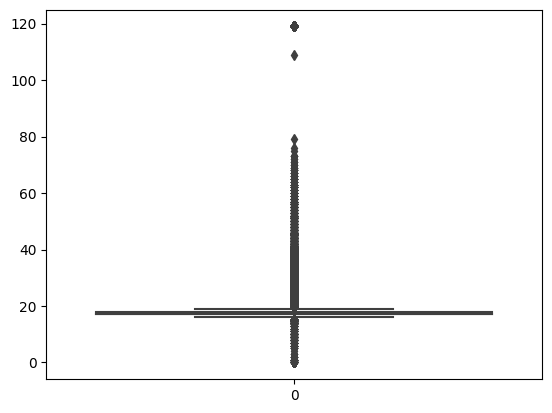

In [26]:
sns.boxplot(df.EDAD)

In [27]:
q3 = df["EDAD"].quantile(0.75)
q1 = df["EDAD"].quantile(0.25)

In [28]:
Rango_intercuarilico = q3 -q1

In [29]:
Rango_intercuarilico


1.0

In [30]:
minimo_edad = q1 - 1.5*Rango_intercuarilico
maximo_edad = q3 + 1.5*Rango_intercuarilico

In [31]:
df = df[(df["EDAD"] > minimo_edad) & (df["EDAD"] < maximo_edad)]


In [32]:
df=df.reset_index(drop=True)


### Exporting to df_clean.csv: the data is prepared to EDA.

In [33]:
df.to_csv('df_clean.csv', index=False)